In [16]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.

x_train = x_train.reshape( (len(x_train), 28,28,1))
x_test = x_test.reshape( (len(x_test), 28,28,1))

print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


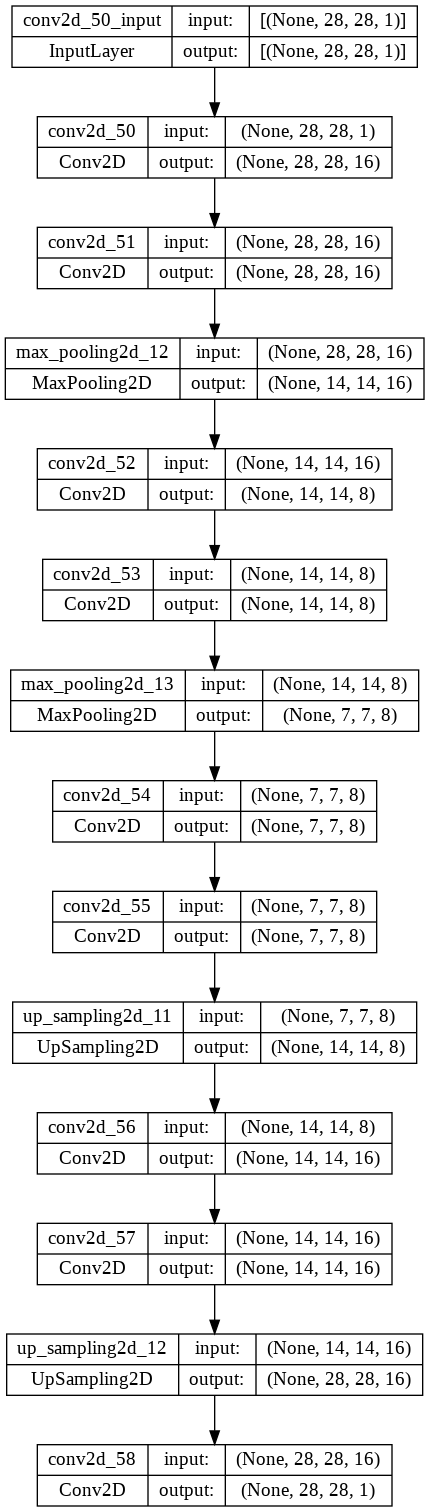

In [19]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential


# 모델을 여기에 구현하세요
# autoencoder = 
# autoencoder = Sequential()
# autoencoder.add(Dense(128, activation='relu', input_shape=(784,)))
# autoencoder.add(Dense(64, activation = 'relu'))
# autoencoder.add(Dense(32, activation = 'relu'))

# autoencoder.add(Dense(64, activation = 'relu'))
# autoencoder.add(Dense(128, activation = 'relu'))
# autoencoder.add(Dense(784, activation = 'sigmoid'))

der = Sequential()
der.add(Conv2D(16, (3,3), activation = 'relu', padding = 'same', input_shape=(28,28,1)))
der.add(Conv2D(16, (3,3), activation = 'relu', padding = 'same'))
der.add(MaxPooling2D(2,2))
der.add(Conv2D(8, (3,3), activation = 'relu', padding = 'same'))
der.add(Conv2D(8, (3,3), activation = 'relu', padding = 'same'))
der.add(MaxPooling2D(2,2))

der.add(Conv2D(8, (3,3), activation = 'relu', padding = 'same'))
der.add(Conv2D(8, (3,3), activation = 'relu', padding = 'same'))
der.add(UpSampling2D((2,2)))
der.add(Conv2D(16, (3,3), activation = 'relu', padding = 'same'))
der.add(Conv2D(16, (3,3), activation = 'relu', padding = 'same'))
der.add(UpSampling2D((2,2)))
der.add(Conv2D(1, (3,3), activation = 'sigmoid', padding ='same'))


from keras.utils import plot_model
plot_model(der, show_shapes=True)

In [22]:
der.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

der.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 4s 12ms/step - loss: 0.0740 - accuracy: 0.8151 - val_loss: 0.0705 - val_accuracy: 0.8143
Epoch 2/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0710 - accuracy: 0.8153 - val_loss: 0.0703 - val_accuracy: 0.8143
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0709 - accuracy: 0.8153 - val_loss: 0.0702 - val_accuracy: 0.8143
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0708 - accuracy: 0.8153 - val_loss: 0.0703 - val_accuracy: 0.8143
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0707 - accuracy: 0.8153 - val_loss: 0.0701 - val_accuracy: 0.8143
Epoch 6/20
181/235 [======================>.......] - ETA: 0s - loss: 0.0705 - accuracy: 0.8154

KeyboardInterrupt: ignored

In [9]:
# test 데이터의 모든 이미지를 복원
decoded_imgs = der.predict(x_test)

313/313 [==============================] - 1s 2ms/step


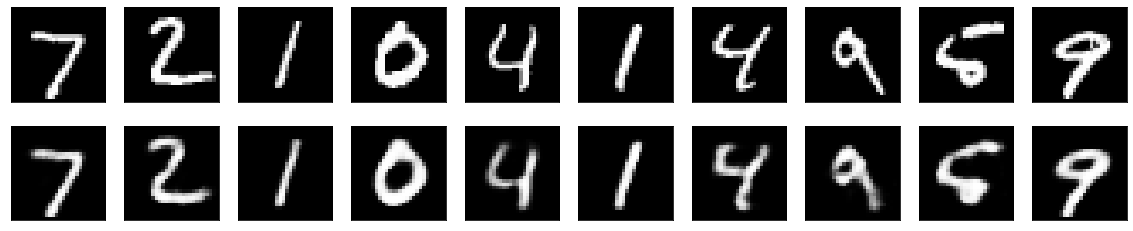

In [10]:
import matplotlib.pyplot as plt
n = 10

#그 중 10장을 선택하여 가시화 (입력 10장, 복원된 출력 10장)
plt.figure(figsize=(20, 4))

for i in range(n):
    # plt.subplot( nrow, ncol, index)
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()